In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Any results you write to the current directory are saved as output.

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
data = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv', index_col=0)

print(data.head())
#print(data.head())
#print(data.iloc[:,2])
print('in totale ci sono {} righe'.format(data.iloc[:,0].value_counts().sum()))

print(data.describe())
print('\n')
print(data.isnull().sum()) #no null values
#data['Date'] = data['Date'].apply(lambda x : int(x))

                  SPX        GLD        USO     SLV   EUR/USD
Date                                                         
1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099
in totale ci sono 2290 righe
               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303296
75%    2073.010070   132.840004    37.82

In [3]:
label = data.iloc[:,1]
data.drop(data.columns[1], axis=1, inplace=True)

print(label)



Date
1/2/2008      84.860001
1/3/2008      85.570000
1/4/2008      85.129997
1/7/2008      84.769997
1/8/2008      86.779999
                ...    
5/8/2018     124.589996
5/9/2018     124.330002
5/10/2018    125.180000
5/14/2018    124.489998
5/16/2018    122.543800
Name: GLD, Length: 2290, dtype: float64


In [4]:
train_data,  test_data, train_label, test_label =  train_test_split(data, label, test_size=0.1)

print('train data has {} righe'.format(train_data.iloc[:,0].value_counts().sum()))
print('test data has {} righe'.format(train_label.size))

#train_data.drop(train_data.iloc[0,:], axis=1, inplace=True)

# print('train_data: \n')
# print(train_data.shape)
# print('train_label: \n')
# print(train_label.shape)


# print('test_data: \n')
# print(test_data.shape)
# print('test_label: \n')
# print(test_label.shape)

print(test_data)
print(test_label)

train data has 2061 righe
test data has 2061 righe
                    SPX        USO        SLV   EUR/USD
Date                                                   
11/16/2010  1178.339966  35.450001  24.930000  1.357478
1/25/2017   2298.370117  11.310000  16.100000  1.072869
5/8/2017    2399.379883   9.670000  15.410000  1.092777
11/25/2013  1802.479980  33.820000  19.270000  1.355234
6/3/2014    1924.239990  37.639999  18.100000  1.362101
...                 ...        ...        ...       ...
9/25/2012   1441.589966  33.750000  32.680000  1.290006
1/30/2012   1313.010010  38.009998  32.529999  1.320795
11/9/2016   2163.260010  10.280000  17.450001  1.101904
12/23/2013  1827.989990  35.360001  18.719999  1.367839
6/30/2011   1320.640015  37.240002  33.840000  1.449695

[229 rows x 4 columns]
Date
11/16/2010    130.970001
1/25/2017     114.320000
5/8/2017      116.750000
11/25/2013    120.459999
6/3/2014      120.010002
                 ...    
9/25/2012     170.770004
1/30/2012     168

In [5]:
print(train_label)

Date
11/20/2013    120.120003
12/13/2012    164.369995
6/19/2013     130.589996
4/15/2009      87.500000
1/13/2015     118.160004
                 ...    
3/31/2014     123.610001
5/2/2016      123.239998
2/15/2017     117.449997
4/23/2018     125.620003
6/18/2014     122.669998
Name: GLD, Length: 2061, dtype: float64


In [6]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(4))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(128))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(1024))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(2048))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(1024))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(512))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(256))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(128))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(16))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

In [7]:
print(train_data.iloc[:,0].value_counts().sum())

#train_data.drop(train_data.columns[0], axis=1, inplace=True)

print(np.array(train_data).shape)
print(np.array(train_label).size)

print(train_data.head())


2061
(2061, 4)
2061
                    SPX        USO        SLV   EUR/USD
Date                                                   
11/20/2013  1781.369995  33.630001  19.139999  1.356742
12/13/2012  1419.449951  31.580000  31.530001  1.306677
6/19/2013   1628.930054  34.779999  20.600000  1.329186
4/15/2009    852.059998  29.309999  12.550000  1.318044
1/13/2015   2023.030029  17.620001  16.290001  1.183152


In [8]:
print(train_data.head())


model.fit(np.array(train_data), np.array(train_label), epochs=500)

                    SPX        USO        SLV   EUR/USD
Date                                                   
11/20/2013  1781.369995  33.630001  19.139999  1.356742
12/13/2012  1419.449951  31.580000  31.530001  1.306677
6/19/2013   1628.930054  34.779999  20.600000  1.329186
4/15/2009    852.059998  29.309999  12.550000  1.318044
1/13/2015   2023.030029  17.620001  16.290001  1.183152
Epoch 1/500
2061/2061 [==============================] - 4s 2ms/sample - loss: 121.0127 - mean_absolute_error: 121.0127
Epoch 2/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 120.0940 - mean_absolute_error: 120.0940
Epoch 3/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 119.0677 - mean_absolute_error: 119.0677
Epoch 4/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 117.9022 - mean_absolute_error: 117.9022
Epoch 5/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 116.4734 - mean_absolute_error: 116.4734
Epoch 6/

2061/2061 [==============================] - 3s 1ms/sample - loss: 5.7645 - mean_absolute_error: 5.7645
Epoch 68/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 5.7797 - mean_absolute_error: 5.7797
Epoch 69/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 5.9537 - mean_absolute_error: 5.9537
Epoch 70/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 5.7442 - mean_absolute_error: 5.7442
Epoch 71/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 5.8313 - mean_absolute_error: 5.8313
Epoch 72/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 5.7350 - mean_absolute_error: 5.7350
Epoch 73/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 5.6277 - mean_absolute_error: 5.6277
Epoch 74/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 5.8487 - mean_absolute_error: 5.8487
Epoch 75/500
2061/2061 [==============================] - 3s 1ms/sample - los

2061/2061 [==============================] - 3s 1ms/sample - loss: 4.8750 - mean_absolute_error: 4.8750
Epoch 137/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.8175 - mean_absolute_error: 4.8175
Epoch 138/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.7608 - mean_absolute_error: 4.7608
Epoch 139/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.7789 - mean_absolute_error: 4.7789
Epoch 140/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.9552 - mean_absolute_error: 4.9552
Epoch 141/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.9312 - mean_absolute_error: 4.9312
Epoch 142/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.7747 - mean_absolute_error: 4.7747
Epoch 143/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.7632 - mean_absolute_error: 4.7632
Epoch 144/500
2061/2061 [==============================] - 3s 1ms/samp

2061/2061 [==============================] - 3s 2ms/sample - loss: 4.2828 - mean_absolute_error: 4.2828
Epoch 206/500
2061/2061 [==============================] - 3s 2ms/sample - loss: 4.1467 - mean_absolute_error: 4.1467 1s - loss: 4.1626 - mean
Epoch 207/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.3157 - mean_absolute_error: 4.3157
Epoch 208/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.0623 - mean_absolute_error: 4.0623
Epoch 209/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.1476 - mean_absolute_error: 4.1476
Epoch 210/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.1613 - mean_absolute_error: 4.1613
Epoch 211/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.2331 - mean_absolute_error: 4.2331
Epoch 212/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.3022 - mean_absolute_error: 4.3022
Epoch 213/500
2061/2061 [====================

2061/2061 [==============================] - 3s 1ms/sample - loss: 3.8086 - mean_absolute_error: 3.8086
Epoch 275/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.8136 - mean_absolute_error: 3.8136
Epoch 276/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.8473 - mean_absolute_error: 3.8473
Epoch 277/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.9283 - mean_absolute_error: 3.9283
Epoch 278/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.9069 - mean_absolute_error: 3.9069
Epoch 279/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.7897 - mean_absolute_error: 3.7897
Epoch 280/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.6234 - mean_absolute_error: 3.6234
Epoch 281/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.8353 - mean_absolute_error: 3.8353
Epoch 282/500
2061/2061 [==============================] - 3s 1ms/samp

2061/2061 [==============================] - 3s 1ms/sample - loss: 3.6465 - mean_absolute_error: 3.6465
Epoch 344/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.4573 - mean_absolute_error: 3.4573
Epoch 345/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.3437 - mean_absolute_error: 3.3437
Epoch 346/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.3699 - mean_absolute_error: 3.3699
Epoch 347/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.4855 - mean_absolute_error: 3.4855
Epoch 348/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.4041 - mean_absolute_error: 3.4041
Epoch 349/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.3846 - mean_absolute_error: 3.3846
Epoch 350/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.4264 - mean_absolute_error: 3.4264
Epoch 351/500
2061/2061 [==============================] - 3s 1ms/samp

2061/2061 [==============================] - 3s 1ms/sample - loss: 3.1867 - mean_absolute_error: 3.1867
Epoch 413/500
2061/2061 [==============================] - 3s 2ms/sample - loss: 3.2812 - mean_absolute_error: 3.2812
Epoch 414/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.3108 - mean_absolute_error: 3.3108
Epoch 415/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.1800 - mean_absolute_error: 3.1800
Epoch 416/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.0806 - mean_absolute_error: 3.0806
Epoch 417/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.2981 - mean_absolute_error: 3.2981
Epoch 418/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.1193 - mean_absolute_error: 3.1193
Epoch 419/500
2061/2061 [==============================] - 3s 2ms/sample - loss: 3.3727 - mean_absolute_error: 3.3727
Epoch 420/500
2061/2061 [==============================] - 3s 2ms/samp

2061/2061 [==============================] - 3s 1ms/sample - loss: 3.0283 - mean_absolute_error: 3.0283
Epoch 482/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.1095 - mean_absolute_error: 3.1095
Epoch 483/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 2.9409 - mean_absolute_error: 2.9409
Epoch 484/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 2.7474 - mean_absolute_error: 2.7474
Epoch 485/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 2.8765 - mean_absolute_error: 2.8765
Epoch 486/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.0315 - mean_absolute_error: 3.0315
Epoch 487/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.1726 - mean_absolute_error: 3.1726
Epoch 488/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 2.9629 - mean_absolute_error: 2.9629
Epoch 489/500
2061/2061 [==============================] - 3s 1ms/samp

In [9]:
print(np.array(test_data))

[[1.17833997e+03 3.54500010e+01 2.49300000e+01 1.35747800e+00]
 [2.29837012e+03 1.13100000e+01 1.61000000e+01 1.07286900e+00]
 [2.39937988e+03 9.67000000e+00 1.54100000e+01 1.09277700e+00]
 [1.80247998e+03 3.38200000e+01 1.92700000e+01 1.35523400e+00]
 [1.92423999e+03 3.76399990e+01 1.81000000e+01 1.36210100e+00]
 [2.07606006e+03 1.18200000e+01 1.54200000e+01 1.11379700e+00]
 [1.74189001e+03 3.45200000e+01 1.86100010e+01 1.34881800e+00]
 [2.05968994e+03 1.75800000e+01 1.62300000e+01 1.07699400e+00]
 [1.58269995e+03 3.23899990e+01 2.28600010e+01 1.31821800e+00]
 [1.27019995e+03 3.80800020e+01 2.90800000e+01 1.33568400e+00]
 [1.35457996e+03 3.65200000e+01 2.83799990e+01 1.29366100e+00]
 [2.27043994e+03 1.15400000e+01 1.59100000e+01 1.05977100e+00]
 [1.30893005e+03 3.07000010e+01 2.77900010e+01 1.24781600e+00]
 [1.96941003e+03 1.50200000e+01 1.41200000e+01 1.12073700e+00]
 [1.06876001e+03 3.74300000e+01 1.71399990e+01 1.47329700e+00]
 [1.65262000e+03 3.74300000e+01 1.84800000e+01 1.318774

In [10]:
model.evaluate(np.array(test_data), np.array(test_label))

229/229 [==============================] - 0s 1ms/sample - loss: 5.0752 - mean_absolute_error: 5.0752


[5.075210941931045, 5.0752106]

In [11]:
for i in range(0,10):
    print(train_label[i])
    #print(np.array(train_data.iloc[i,:]).reshape(1,4))
    print(model.predict(np.array(train_data.iloc[i,:]).reshape(1,4)))

120.120003
[[122.032646]]
164.369995
[[163.12595]]
130.58999599999999
[[128.51054]]
87.5
[[90.14632]]
118.160004
[[117.14146]]
123.709999
[[127.092026]]
129.470001
[[126.05775]]
157.199997
[[135.0049]]
121.050003
[[117.81351]]
134.300003
[[132.00342]]


In [12]:
np.array(train_data).reshape(len(train_data),4)

array([[1.78137000e+03, 3.36300010e+01, 1.91399990e+01, 1.35674200e+00],
       [1.41944995e+03, 3.15800000e+01, 3.15300010e+01, 1.30667700e+00],
       [1.62893005e+03, 3.47799990e+01, 2.06000000e+01, 1.32918600e+00],
       ...,
       [2.34925000e+03, 1.13600000e+01, 1.70400010e+01, 1.05783200e+00],
       [2.67029004e+03, 1.39200000e+01, 1.56700000e+01, 1.22089700e+00],
       [1.95697998e+03, 3.90099980e+01, 1.90499990e+01, 1.35906500e+00]])

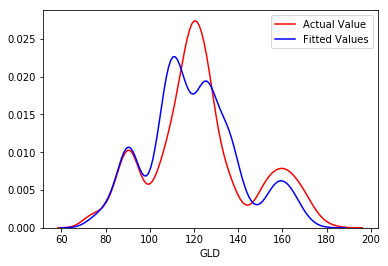

In [13]:
import seaborn as sns
ax1 = sns.distplot(train_label, hist=False, color="r", label="Actual Value")
sns.distplot(model.predict(np.array(train_data).reshape(len(train_data),4)), hist=False, color="b", label="Fitted Values" , ax=ax1)

In [14]:
timestamps = ['04/29/2019', '04/30/2019', '05/01/2019', '05/02/2019', '05/03/2019', '05/06/2019', '05/07/2019', '05/08/2019', '05/09/2019', '05/10/2019', '05/13/2019', '05/14/2019', '05/15/2019', '05/16/2019', '05/17/2019', '05/20/2019', '05/21/2019', '05/22/2019', '05/23/2019', '05/24/2019', '05/28/2019', '05/29/2019', '05/30/2019', '05/31/2019', '06/03/2019', '06/04/2019', '06/05/2019', '06/06/2019', '06/07/2019', '06/10/2019', '06/11/2019', '06/12/2019', '06/13/2019', '06/14/2019', '06/17/2019', '06/18/2019', '06/19/2019', '06/20/2019', '06/21/2019', '06/24/2019', '06/25/2019', '06/26/2019', '06/27/2019', '06/28/2019', '07/01/2019', '07/02/2019', '07/03/2019', '07/05/2019', '07/08/2019', '07/09/2019', '07/10/2019', '07/11/2019', '07/12/2019', '07/15/2019', '07/16/2019', '07/17/2019', '07/18/2019', '07/19/2019', '07/22/2019', '07/23/2019', '07/24/2019', '07/25/2019', '07/26/2019', '07/29/2019', '07/30/2019', '07/31/2019', '08/01/2019', '08/02/2019', '08/05/2019', '08/06/2019', '08/07/2019', '08/08/2019', '08/09/2019', '08/12/2019', '08/13/2019', '08/14/2019', '08/15/2019', '08/16/2019', '08/19/2019', '08/20/2019', '08/21/2019', '08/22/2019', '08/23/2019', '08/26/2019', '08/27/2019', '08/28/2019', '08/29/2019', '08/30/2019', '09/03/2019', '09/04/2019', '09/05/2019', '09/06/2019', '09/09/2019', '09/10/2019', '09/11/2019', '09/12/2019', '09/13/2019', '09/16/2019', '09/17/2019', '09/18/2019', '09/19/2019', '09/20/2019', '09/23/2019', '09/24/2019', '09/25/2019', '09/26/2019', '09/27/2019', '09/30/2019', '10/01/2019', '10/02/2019', '10/03/2019', '10/04/2019', '10/07/2019', '10/08/2019', '10/09/2019', '10/10/2019', '10/11/2019', '10/14/2019', '10/15/2019', '10/16/2019', '10/17/2019', '10/18/2019', '10/21/2019', '10/22/2019', '10/23/2019', '10/24/2019', '10/25/2019', '10/28/2019', '10/29/2019', '10/30/2019', '10/31/2019', '11/01/2019', '11/04/2019', '11/05/2019', '11/06/2019', '11/07/2019', '11/08/2019', '11/11/2019', '11/12/2019', '11/13/2019', '11/14/2019', '11/15/2019', '11/18/2019', '11/19/2019', '11/20/2019', '11/21/2019', '11/22/2019', '11/25/2019', '11/26/2019', '11/27/2019', '11/29/2019', '12/02/2019', '12/03/2019', '12/04/2019', '12/05/2019', '12/06/2019', '12/09/2019', '12/10/2019', '12/11/2019', '12/12/2019', '12/13/2019', '12/16/2019', '12/17/2019', '12/18/2019', '12/19/2019', '12/20/2019', '12/23/2019', '12/24/2019', '12/26/2019', '12/27/2019', '12/30/2019', '12/31/2019', '01/02/2020', '01/03/2020', '01/06/2020', '01/07/2020', '01/08/2020', '01/09/2020', '01/10/2020', '01/13/2020', '01/14/2020', '01/15/2020', '01/16/2020', '01/17/2020', '01/21/2020', '01/22/2020', '01/23/2020', '01/24/2020', '01/27/2020', '01/28/2020', '01/29/2020', '01/30/2020', '01/31/2020', '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020', '02/07/2020', '02/10/2020', '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020', '02/18/2020', '02/19/2020', '02/20/2020', '02/21/2020', '02/24/2020', '02/25/2020', '02/26/2020', '02/27/2020', '02/28/2020', '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020', '03/09/2020', '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/02/2020', '04/03/2020', '04/06/2020', '04/07/2020', '04/08/2020', '04/09/2020', '04/13/2020', '04/14/2020', '04/15/2020', '04/16/2020', '04/17/2020', '04/20/2020', '04/21/2020', '04/22/2020', '04/23/2020', '04/24/2020']

In [15]:
SPXdata = pd.read_csv('/kaggle/input/gold-spx-gld-uso-eurusd/SPX_1y.csv', index_col=0)
# print(SPXdata.head())
# print(SPXdata.iloc[:,0])
#SPXdata.index = pd.Series.dt.strftime('%m/%d/%Y')


# Only use the open data
SPXdata = SPXdata.iloc[:,0]
print(SPXdata.head())


Date
2019-04-29    2940.580078
2019-04-30    2937.139893
2019-05-01    2952.330078
2019-05-02    2922.159912
2019-05-03    2929.209961
Name: Open, dtype: float64


In [16]:
EURdata = pd.read_csv('/kaggle/input/gold-spx-gld-uso-eurusd/EURUSDX.csv', index_col=0)
# print(EURdata.head())
# print(EURdata.iloc[:,0])

# Only use the open data
EURdata = EURdata.iloc[:,0]
#print(EURdata.head())


In [17]:
USOdata = pd.read_csv('/kaggle/input/gold-spx-gld-uso-eurusd/USO.csv', index_col=0)
# print(USOdata.head())
# print(USOdata.iloc[:,0])

# Only use the open data
USOdata = USOdata.iloc[:,0]
print(USOdata.head())

Date
2019-04-29    13.15
2019-04-30    13.35
2019-05-01    13.28
2019-05-02    12.92
2019-05-03    12.87
Name: Open, dtype: float64


In [18]:
GLDdata = pd.read_csv('/kaggle/input/gold-spx-gld-uso-eurusd/GLD.csv', index_col=0)
# print(GLDdata.head())
# print(GLDdata.iloc[:,0])

# Only use the open data
GLDdata = GLDdata.iloc[:,0]
print(GLDdata.head())

Date
2019-04-29    120.879997
2019-04-30    120.889999
2019-05-01    121.029999
2019-05-02    119.690002
2019-05-03    120.559998
Name: Open, dtype: float64


In [19]:
SLVdata = pd.read_csv('/kaggle/input/gold-spx-gld-uso-eurusd/SLV.csv', index_col=0)
# print(GLDdata.head())
# print(GLDdata.iloc[:,0])

# Only use the open data
SLVdata = SLVdata.iloc[:,0]
print(GLDdata.head())

Date
2019-04-29    120.879997
2019-04-30    120.889999
2019-05-01    121.029999
2019-05-02    119.690002
2019-05-03    120.559998
Name: Open, dtype: float64


In [20]:
print(train_data.head())

                    SPX        USO        SLV   EUR/USD
Date                                                   
11/20/2013  1781.369995  33.630001  19.139999  1.356742
12/13/2012  1419.449951  31.580000  31.530001  1.306677
6/19/2013   1628.930054  34.779999  20.600000  1.329186
4/15/2009    852.059998  29.309999  12.550000  1.318044
1/13/2015   2023.030029  17.620001  16.290001  1.183152


In [21]:
# # Transfer Timestamp format
# timestamp_lst = []
# for i in SPXdata.index:
#     timestamp_lst.append(i)
# #print((timestamp_lst))
# timestamp = pd.Series(data=timestamp_lst)
# #print(timestamp)
# timestamp = pd.to_datetime(timestamp)
# timestamp = timestamp.dt.strftime('%m/%d/%Y')
# #print(type(timestamp))
# timestamp_lst = []
# for j in timestamp:
#     timestamp_lst.append(j)
# print(timestamp_lst)

In [22]:
print(GLDdata.head())

Date
2019-04-29    120.879997
2019-04-30    120.889999
2019-05-01    121.029999
2019-05-02    119.690002
2019-05-03    120.559998
Name: Open, dtype: float64


In [23]:
# reindex datetime
GLDdata = GLDdata.reset_index(drop=True)
SPXdata = SPXdata.reset_index(drop=True)
EURdata = EURdata.reset_index(drop=True)[:251]
USOdata = USOdata.reset_index(drop=True)
SLVdata = SLVdata.reset_index(drop=True)

GLDdata.index = timestamps
SPXdata.index = timestamps
EURdata.index = timestamps
USOdata.index = timestamps
SLVdata.index = timestamps

print(type(GLDdata))
print(type(SPXdata))
print(type(EURdata))
print(type(USOdata))
print(type(SLVdata))

print(GLDdata.head())
print(SPXdata.head())
print(EURdata.head())
print(USOdata.head())
print(SLVdata.head())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
04/29/2019    120.879997
04/30/2019    120.889999
05/01/2019    121.029999
05/02/2019    119.690002
05/03/2019    120.559998
Name: Open, dtype: float64
04/29/2019    2940.580078
04/30/2019    2937.139893
05/01/2019    2952.330078
05/02/2019    2922.159912
05/03/2019    2929.209961
Name: Open, dtype: float64
04/29/2019    1.114902
04/30/2019    1.118418
05/01/2019    1.121831
05/02/2019    1.120185
05/03/2019    1.117256
Name: Open, dtype: float64
04/29/2019    13.15
04/30/2019    13.35
05/01/2019    13.28
05/02/2019    12.92
05/03/2019    12.87
Name: Open, dtype: float64
04/29/2019    14.01
04/30/2019    13.94
05/01/2019    13.89
05/02/2019    13.72
05/03/2019    13.87
Name: Open, dtype: float64


In [24]:
predition_dataset = GLDdata.to_frame()
predition_dataset = predition_dataset.rename(columns={"Open": "GLD"})
print(predition_dataset)

                   GLD
04/29/2019  120.879997
04/30/2019  120.889999
05/01/2019  121.029999
05/02/2019  119.690002
05/03/2019  120.559998
...                ...
04/20/2020  158.619995
04/21/2020  157.600006
04/22/2020  160.500000
04/23/2020  162.389999
04/24/2020  163.130005

[251 rows x 1 columns]


GLDdata
EURdata
USOdata
SPXdata

In [25]:
# GLDdata EURdata USOdata SPXdata
EURdata_lst,USOdata_lst,SPXdata_lst,SLVdata_lst = [],[],[],[]

for data in EURdata:
    # print(data)
    EURdata_lst.append(data)

for data in USOdata:
    #print(data)
    USOdata_lst.append(data)

for data in SPXdata:
    # print(data)
    SPXdata_lst.append(data)

for data in SLVdata:
    # print(data)
    SLVdata_lst.append(data)
    
#print(USOdata_lst)

In [26]:
print(train_data.head())

                    SPX        USO        SLV   EUR/USD
Date                                                   
11/20/2013  1781.369995  33.630001  19.139999  1.356742
12/13/2012  1419.449951  31.580000  31.530001  1.306677
6/19/2013   1628.930054  34.779999  20.600000  1.329186
4/15/2009    852.059998  29.309999  12.550000  1.318044
1/13/2015   2023.030029  17.620001  16.290001  1.183152


In [27]:
# SPX        USO        SLV   EUR/USD
predition_dataset["SPX"] = SPXdata_lst
predition_dataset["USO"] = USOdata_lst
predition_dataset["SLV"] = SLVdata_lst
predition_dataset["EUR/USD"] = EURdata_lst

print(predition_dataset)

                   GLD          SPX    USO    SLV   EUR/USD
04/29/2019  120.879997  2940.580078  13.15  14.01  1.114902
04/30/2019  120.889999  2937.139893  13.35  13.94  1.118418
05/01/2019  121.029999  2952.330078  13.28  13.89  1.121831
05/02/2019  119.690002  2922.159912  12.92  13.72  1.120185
05/03/2019  120.559998  2929.209961  12.87  13.87  1.117256
...                ...          ...    ...    ...       ...
04/20/2020  158.619995  2845.620117   3.76  14.20  1.080194
04/21/2020  157.600006  2784.810059   3.19  13.66  1.089431
04/22/2020  160.500000  2787.889893   2.90  14.01  1.086118
04/23/2020  162.389999  2810.419922   2.68  14.25  1.092598
04/24/2020  163.130005  2812.639893   2.69  14.28  1.093135

[251 rows x 5 columns]


In [28]:
print(predition_dataset)
pre_label = predition_dataset.iloc[:,0]
predition_dataset.drop(predition_dataset.columns[0], axis=1, inplace=True)

print(pre_label)
print(predition_dataset)


                   GLD          SPX    USO    SLV   EUR/USD
04/29/2019  120.879997  2940.580078  13.15  14.01  1.114902
04/30/2019  120.889999  2937.139893  13.35  13.94  1.118418
05/01/2019  121.029999  2952.330078  13.28  13.89  1.121831
05/02/2019  119.690002  2922.159912  12.92  13.72  1.120185
05/03/2019  120.559998  2929.209961  12.87  13.87  1.117256
...                ...          ...    ...    ...       ...
04/20/2020  158.619995  2845.620117   3.76  14.20  1.080194
04/21/2020  157.600006  2784.810059   3.19  13.66  1.089431
04/22/2020  160.500000  2787.889893   2.90  14.01  1.086118
04/23/2020  162.389999  2810.419922   2.68  14.25  1.092598
04/24/2020  163.130005  2812.639893   2.69  14.28  1.093135

[251 rows x 5 columns]
04/29/2019    120.879997
04/30/2019    120.889999
05/01/2019    121.029999
05/02/2019    119.690002
05/03/2019    120.559998
                 ...    
04/20/2020    158.619995
04/21/2020    157.600006
04/22/2020    160.500000
04/23/2020    162.389999
04/24/

In [29]:
print((predition_dataset))
#print(np.array(pre_label))

                    SPX    USO    SLV   EUR/USD
04/29/2019  2940.580078  13.15  14.01  1.114902
04/30/2019  2937.139893  13.35  13.94  1.118418
05/01/2019  2952.330078  13.28  13.89  1.121831
05/02/2019  2922.159912  12.92  13.72  1.120185
05/03/2019  2929.209961  12.87  13.87  1.117256
...                 ...    ...    ...       ...
04/20/2020  2845.620117   3.76  14.20  1.080194
04/21/2020  2784.810059   3.19  13.66  1.089431
04/22/2020  2787.889893   2.90  14.01  1.086118
04/23/2020  2810.419922   2.68  14.25  1.092598
04/24/2020  2812.639893   2.69  14.28  1.093135

[251 rows x 4 columns]


In [30]:
model.evaluate(np.array(predition_dataset), np.array(pre_label))

251/251 [==============================] - 0s 323us/sample - loss: nan - mean_absolute_error: nan


[nan, nan]

In [31]:
predictions = model.predict(np.array(predition_dataset)[:20])
print('predictions:', predictions)

predictions: [[126.99082 ]
 [127.2108  ]
 [126.76268 ]
 [127.335205]
 [127.06422 ]
 [127.65727 ]
 [127.57862 ]
 [128.5669  ]
 [128.71727 ]
 [128.68396 ]
 [129.00175 ]
 [129.22887 ]
 [129.1434  ]
 [128.84245 ]
 [128.74754 ]
 [129.00192 ]
 [128.74956 ]
 [       nan]
 [128.74335 ]
 [128.71164 ]]


In [35]:
prediction_lst = []
for j in range(0,10):
    print(model.predict(np.array(predition_dataset.iloc[j,:]).reshape(1,4)))
    prediction_lst.append(model.predict(np.array(predition_dataset.iloc[j,:]).reshape(1,4)))
    

for k in range (len(prediction_lst)):
    prediction_lst[k] = prediction_lst[k][0][0]
print(prediction_lst)

[[126.9908]]
[[127.21079]]
[[126.762665]]
[[127.3352]]
[[127.06419]]
[[127.657265]]
[[127.5786]]
[[128.56691]]
[[128.71725]]
[[128.68398]]
[126.9908, 127.21079, 126.762665, 127.3352, 127.06419, 127.657265, 127.5786, 128.56691, 128.71725, 128.68398]


In [36]:
pre_check_label = pd.Series(prediction_lst)

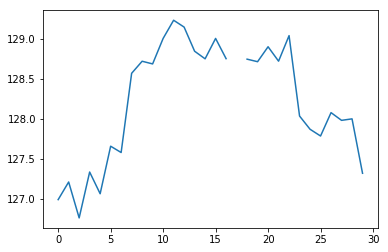

In [34]:
p = plt.plot([i for i in range(10)], pre_check_label.values)